# Pseudo-random number generators

The classic and infamous [RANDU](http://en.wikipedia.org/wiki/RANDU). This is a simplified version of a version  courtesy of [ptomato on github](https://github.com/ptomato/randu/blob/master/randu.py).

> "...its very name RANDU is enough to bring dismay into the eyes and stomachs
>  of many computer scientists!"
>
>  Donald E. Knuth, The Art of Computer Programming

In [1]:
import numpy as np

class RANDU:
    "Pseudorandom number generator RANDU, a (flawed) linear congruential PRNG."
    def __init__(self, seed=None):
        self.seed(seed)

    def seed(self, s):
        self._state = hash(s) % 2147483648  # == 2^31

    def _random(self):
        self._state = (65539 * self._state) % 2147483648
        return self._state / 2147483648
    
    def random(self, size=None):
        "Return one random number or an array of them, with `size` elements."
        if size is None:
            return self._random()
        else:
            r = self._random
            return np.array([r() for i in range(size)])

In [2]:
RANDU().random(10)

array([0.01464616, 0.89467701, 0.23624659, 0.3653865 , 0.0660997 ,
       0.10811965, 0.05382062, 0.34984688, 0.61469567, 0.5395521 ])

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')
sns.set_context('talk', font_scale=1.4)

<IPython.core.display.Javascript object>


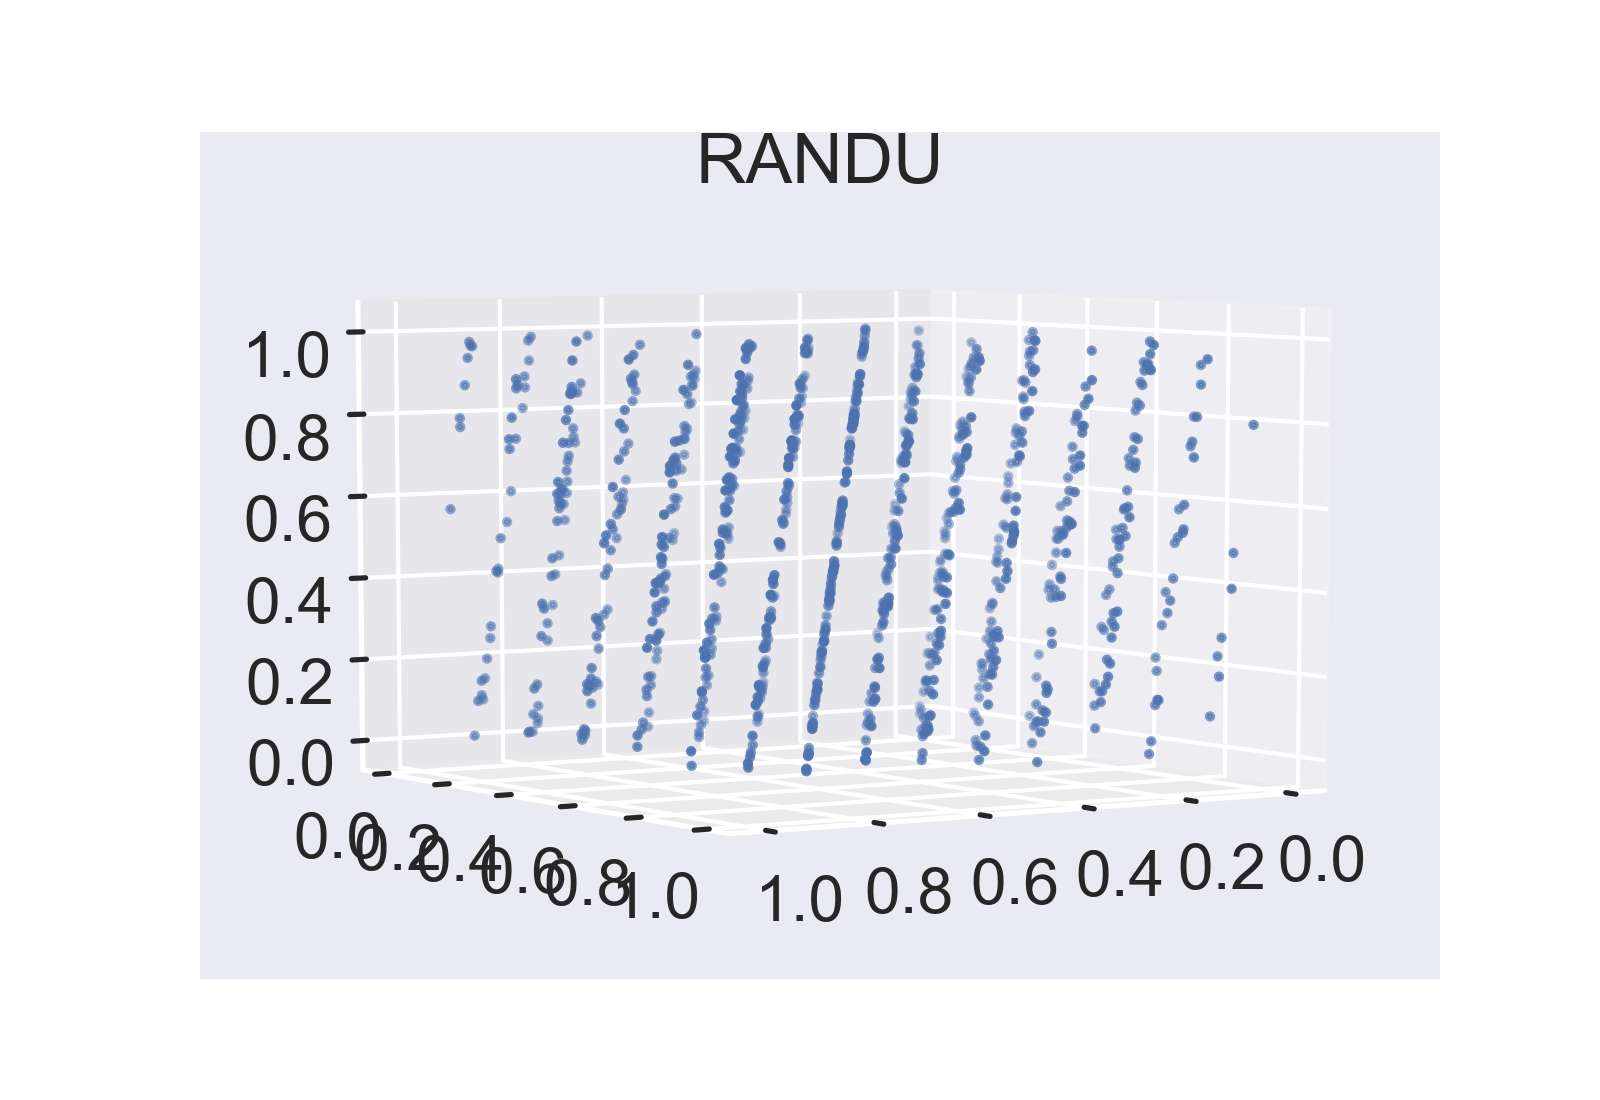

In [18]:
npts = 1_000

pts = RANDU().random(npts*3).reshape(npts, 3)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=5);
plt.title("RANDU");

This is what similar output looks like for Numpy, which uses the [Mersenne Twister PRNG](https://en.wikipedia.org/wiki/Mersenne_Twister), whose period is $2^{19937}-1 (\approx \cal{O}(10^{6001}))$ and which does not suffer from known serial correlations:

<IPython.core.display.Javascript object>


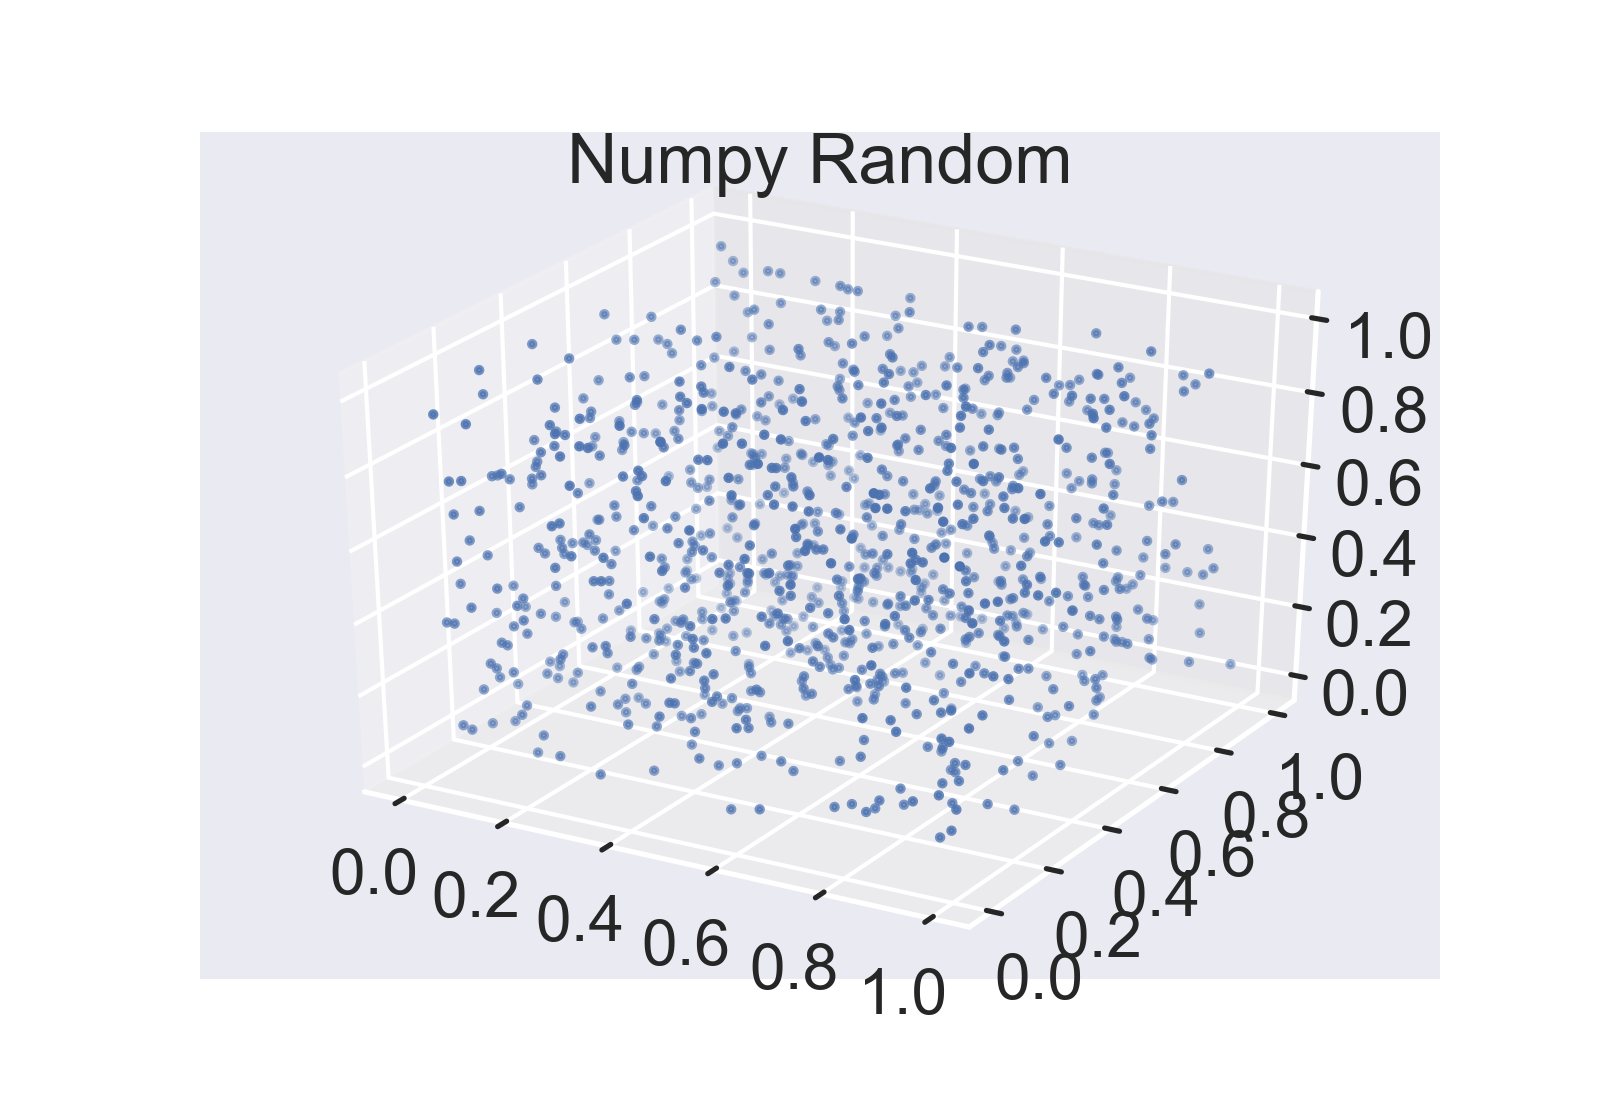

In [6]:
pts = np.random.uniform(size=(npts, 3))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=5)
plt.title("Numpy Random");

# A terrible PRNG

Let's implement a simple linear congruential PRNG of the type

$$ X_{k+1} = a X_k \mod M $$

with particularly bad constants $a$, $M$ and seed $X_0$:

In [7]:
a = 3
M = 64
seed = 17

In [8]:
state = seed
numbers = []
for i in range(100):
    state = (a * state) % M
    numbers.append(state)
numbers = np.array(numbers)
print(numbers)

[51 25 11 33 35 41 59 49 19 57 43  1  3  9 27 17 51 25 11 33 35 41 59 49
 19 57 43  1  3  9 27 17 51 25 11 33 35 41 59 49 19 57 43  1  3  9 27 17
 51 25 11 33 35 41 59 49 19 57 43  1  3  9 27 17 51 25 11 33 35 41 59 49
 19 57 43  1  3  9 27 17 51 25 11 33 35 41 59 49 19 57 43  1  3  9 27 17
 51 25 11 33]


In [9]:
sorted(set(numbers))

[1, 3, 9, 11, 17, 19, 25, 27, 33, 35, 41, 43, 49, 51, 57, 59]

In [10]:
len(_)

16

In [11]:
np.nonzero(numbers==1)

(array([11, 27, 43, 59, 75, 91]),)

In [12]:
np.diff(_)

array([[16, 16, 16, 16, 16]])

In [13]:
%matplotlib inline

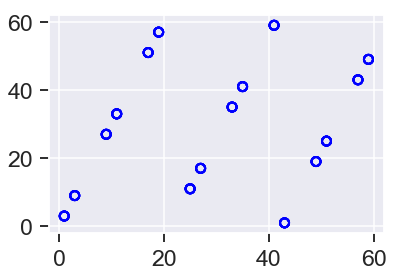

In [14]:
randx = numbers[:-1]
randy = numbers[1:]
plt.scatter(randx, randy, facecolors='none', edgecolors='b', linewidth=2);